# Anomaly Detection Practice On Credit Card Fraud Using SMOTE
## Brett Neubeck

## Table of Contents

- [Summary](#summary)
- [Import Packages](#import_python_packages)
- [Read CSV And Explore Column Names](#loading_data)
- [Ratios & Value_Counts For Targets](#ratio)
- [Explore Data In Graph Form](#graph)
- [Compare Original Dataset to SMOTE Dataset](#smote)
- [Explanation Of Confusion Matrix](#confusion)
- [Model Section](#models)
- [Conclusion](#conclusion)


### Summary

This project serves as a comprehensive demonstration of anomaly detection techniques applied to a credit card fraud dataset. In the realm of machine learning, unbalanced datasets present a prevalent challenge, characterized by a significant disparity in the number of instances between different classes. This disparity often results in a skewed model performance, wherein the algorithm exhibits a preference for the majority class while striving to minimize overall error.

To effectively tackle this issue, various methodologies have been developed, with minority oversampling and majority undersampling being prominent strategies. These techniques are routinely leveraged to rectify dataset imbalances, enhancing the model's capacity to precisely classify instances belonging to the minority class.

**Minority Oversampling:**
In minority oversampling, the goal is to increase the representation of the minority class by generating synthetic instances. One prominent method for this purpose is the Synthetic Minority Over-sampling Technique (SMOTE). SMOTE works by creating synthetic samples for the minority class by interpolating between existing data points. It selects a minority instance, identifies its k nearest neighbors, and generates new instances along the line segments connecting the chosen instance to its neighbors. This effectively augments the minority class and helps balance the dataset.

**Majority Undersampling:**
On the other hand, majority undersampling involves reducing the number of instances in the majority class to match the minority class. This can be done randomly or through more sophisticated techniques that carefully select instances to maintain the dataset's representativeness.

**Challenges with Measurement:**
Evaluating models trained on imbalanced datasets poses its own set of challenges. Traditional metrics like ROC AUC (Receiver Operating Characteristic Area Under the Curve) may not be the most appropriate choice in such cases because they can be overly optimistic. ROC AUC evaluates a model's ability to discriminate between classes across different thresholds, which can lead to inflated performance scores when the dataset is imbalanced.

**Brier Score Loss:**
Instead of ROC AUC, the Brier Score Loss is a more suitable metric for evaluating models on imbalanced datasets. The Brier Score measures the mean squared difference between the predicted probabilities and the actual outcomes. It rewards models for assigning high probabilities to the true positive instances, making it sensitive to class imbalance.

**Confusion Matrix:**
In addition to the Brier Score, the confusion matrix is a valuable tool for assessing model performance on unbalanced datasets. It breaks down the model's predictions into categories like true positives, true negatives, false positives, and false negatives, providing a clearer picture of how well the model is performing for each class. Metrics like precision, recall, and F1-score can be derived from the confusion matrix, offering a more balanced view of the model's accuracy across classes.

In summary, unbalanced datasets are a common challenge in machine learning, and addressing this issue through techniques like SMOTE, majority undersampling, and appropriate evaluation metrics like the Brier Score Loss and the confusion matrix is crucial for building models that perform well on imbalanced data, especially when ROC AUC is not suitable due to class imbalance.

## Import Packages

In [24]:
# basic python packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# models
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE

# pipeline from imblearn
from imblearn.pipeline import Pipeline

# model prep and evaluation
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# python cmd
import os

# warnings ignore
import warnings
# set warnings to ignore
warnings.filterwarnings('ignore')


## Upload File In GoogleColab

In [2]:
from google.colab import files
import io

uploaded = files.upload()

Saving creditcard_sampledata_3.csv to creditcard_sampledata_3.csv


## Read CSV And Explore Column Names

In [25]:
# read in csv
df = pd.read_csv('creditcard_sampledata_3.csv')

#explore data columns
print(df.head())
print(df.info())

   Unnamed: 0        V1        V2        V3        V4        V5        V6  \
0      258647  1.725265 -1.337256 -1.012687 -0.361656 -1.431611 -1.098681   
1       69263  0.683254 -1.681875  0.533349 -0.326064 -1.455603  0.101832   
2       96552  1.067973 -0.656667  1.029738  0.253899 -1.172715  0.073232   
3      281898  0.119513  0.729275 -1.678879 -1.551408  3.128914  3.210632   
4       86917  1.271253  0.275694  0.159568  1.003096 -0.128535 -0.608730   

         V7        V8        V9  ...       V21       V22       V23       V24  \
0 -0.842274 -0.026594 -0.032409  ...  0.414524  0.793434  0.028887  0.419421   
1 -0.520590  0.114036 -0.601760  ...  0.116898 -0.304605 -0.125547  0.244848   
2 -0.745771  0.249803  1.383057  ... -0.189315 -0.426743  0.079539  0.129692   
3  0.356276  0.920374 -0.160589  ... -0.335825 -0.906171  0.108350  0.593062   
4  0.088777 -0.145336  0.156047  ...  0.031958  0.123503 -0.174528 -0.147535   

        V25       V26       V27       V28  Amount  Class

## Ratios & Value_Counts For Targets

In [26]:
# count fraud anomalies
occ = df['Class'].value_counts()
occ

0    5000
1      50
Name: Class, dtype: int64

In [27]:
# ratio of class column of fraud anomalies
# 0 = no fraud / 1 = Fraud
occ/len(df)

0    0.990099
1    0.009901
Name: Class, dtype: float64

# Explore Data In Graph Form

In [28]:
# function to prep data & segregate the targets from the features
def prep_data(df):
    X = df.iloc[:, 1:30]
    X = np.array(X).astype(float)
    y = df.iloc[:, 30]
    y=np.array(y).astype(float)
    return X,y

In [29]:
# how to search function code
import inspect
lines = inspect.getsource(prep_data)
print(lines)

def prep_data(df):
    X = df.iloc[:, 1:30]
    X = np.array(X).astype(float)
    y = df.iloc[:, 30]
    y=np.array(y).astype(float)
    return X,y



In [30]:
# create scatterplot function taking first two feature columns for x & y axis on graph
def plot_data(X, y):
	plt.scatter(X[y == 0, 0], X[y == 0, 1], label="Class #0", alpha=0.5, linewidth=0.15)
	plt.scatter(X[y == 1, 0], X[y == 1, 1], label="Class #1", alpha=0.5, linewidth=0.15, c='r')
	plt.legend()
	return plt.show()

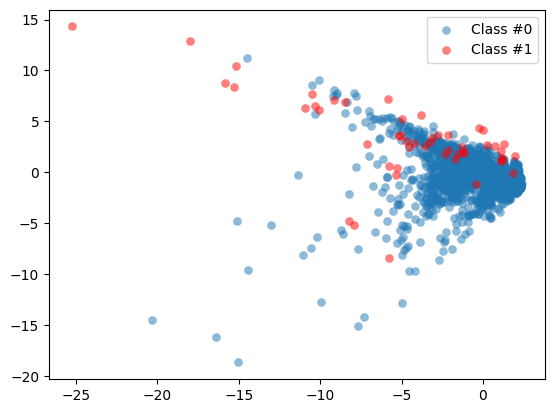

In [31]:
# run data thru the prep data function to segrate the targets from the features
X, y = prep_data(df)

# plot scatterplot
plot_data(X, y)

In [32]:
# oversampling using imlearn.over_sampling smote
# SMOTE = Synthetic Minority Ovrsampling TEchnique / uses knn to create new fraud cases
# initialize and define resampling method SMOTE

method = SMOTE()

In [33]:
# create resampled features and targets
X_resampled, y_resampled = method.fit_resample(X, y)

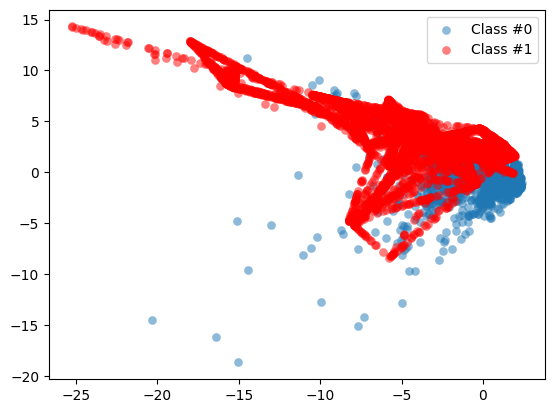

In [34]:
#plot resampled data to compare against prior graph
plot_data(X_resampled, y_resampled)

# Compare Original Dataset to SMOTE Dataset

The expression `X[y == 0, 0]` is a NumPy indexing technique used to extract specific elements from a NumPy array `X`. Let's break down this expression:

- `X` is assumed to be a two-dimensional NumPy array (a matrix).
- `y == 0` creates a Boolean mask, where each element of `y` is checked for equality with `0`. The result is a Boolean array of the same shape as `y`, where `True` represents elements in `y` that are equal to `0`, and `False` represents elements that are not equal to `0`.
- `X[y == 0]` uses this Boolean mask to index the rows of the matrix `X`. It selects all rows where the corresponding element in `y` is equal to `0`. This operation filters the rows of `X` that correspond to class 0.

Now, let's consider the part `X[y == 0, 0]`:

- `X[y == 0, 0]` further indexes the result obtained from `X[y == 0]`. It selects the first column (column at index 0) of the filtered rows from `X` where `y` is equal to `0`.

In summary, `X[y == 0, 0]` is used to extract the values from the first column of the matrix `X` for the rows where the corresponding element in the target array `y` is equal to `0`. This allows you to isolate and access specific data points or features associated with a particular class (in this case, class 0) in a two-dimensional dataset.

In [35]:
# compare plot function
def compare_plot(X,y,X_resampled,y_resampled, method):
    # start a plot figure
    f, (ax1, ax2) = plt.subplots(1, 2)
    # sub-plot number 1, normal data
    c0 = ax1.scatter(X[y == 0, 0], X[y == 0, 1], label="Class #0",alpha=0.5)
    c1 = ax1.scatter(X[y == 1, 0], X[y == 1, 1], label="Class #1",alpha=0.5, c='r')
    ax1.set_title('Original Data')
    # sub-plot number 2, oversampled data
    ax2.scatter(X_resampled[y_resampled == 0, 0], X_resampled[y_resampled == 0, 1], label="Class #0", alpha=.5)
    ax2.scatter(X_resampled[y_resampled == 1, 0], X_resampled[y_resampled == 1, 1], label="Class #1", alpha=.5,c='r')
    ax2.set_title(method)

    plt.figlegend((c0, c1), ('Class #0', 'Class #1'), loc='lower center',
                  ncol=2, labelspacing=0.)
    #plt.tight_layout(pad=3)
    return plt.show()

0.0    5000
1.0      50
dtype: int64
0.0    5000
1.0    5000
dtype: int64


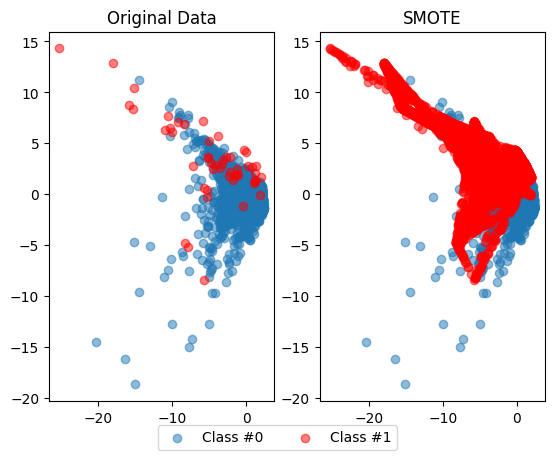

In [36]:
# print original value_counts
print(pd.value_counts(pd.Series(y)))

# print new value_counts
print(pd.value_counts(pd.Series(y_resampled)))

# print compare plot
compare_plot(X, y, X_resampled, y_resampled, method='SMOTE')

## Reminder / Explanation Of Confusion Matrix

<img src="https://lh3.googleusercontent.com/pw/AIL4fc--8CAUWVfqZyDDhx5N18Lea01IiUcXczqLo6J3PQwLCDmAFAiOfqoFdS0-rIqWSCTvqxhlKh6oO8ZYn4nCSQ6y1V9dMR90Nmj6kFoqjgLt7R21NOp6FuFucSO8BbM6WuRCLIfnyw1nQuUzWYBZFISNT6GQ7iGBPekowirGCmBH3uHOUwPx3rdDu_FqwC79M4AyOT_vy5Mp1ENe__JKg9vKJRMJyJlr0fsAOXxk_pNq7mArKjKM1NfaCSdMetOE7kO5IVdPsENEkUpB6wZdkQ_jS8ZCvmWH1xPairxEVE-Gqrl8OfGVUwlzDhVPBAyAbc9Lh3FnIndLeJa2Ciht9A3cN0DY-drWA3Q4rtZAhoHzFHKtI-KjSqGby1bvqY3rXyuWGCl9oNX3tXGF7J0slg_RRMWc8HeuLCzyV2T3JVbJgBmZWhE7uqJZUZ_M2uF4KWJ6sJQ4TEOl5cIDrn7z7dthKbaZTdhAPVaW3Qlus3y6ku7UkQl1HWJel92eyWLcYVk855PTgGIHEZefT49_hy8AUy1JED5tmtEP_EOrzVLoA5O8MvLvwmOKxKg1H7NFs4CMZhi0k10jnl0fSWjQ_I-lypIiEkFFh2jsqZQPkY7sDJfGy14CQ9dyQdRZbRoPh_oAmQgY3PSlFuPg6JBJY-kPY4TyjWmhQCS4rNK55rSpsF2Fi3-JJJe2nSLezWKLgKK1EglX8UVU1k400gAWOwjg8a7yxjjYdOL7XKiKU798i7mtEzS3REBI4CPtv8OitdVEbCKF5CI3mZ6LPF3jn7wLMoZafMxBX-PamVHt6icUKxhUjo64UaiEyicxIrMgizh10D7U7HkZ5NSoHPArqSfi34oT7fnt1d6qRxcLW1s9zh0llc9HHYNp8Sbs4FZu9b4Mnl6oE1eoAsgaAzbtOQ=w667-h566-s-no?authuser=0" alt="Confusion_Matrix_Explained" style="height: 100px; width:100px;"/>

![ConfusionMatrix](ConfusionMatrixPic.jpg)

## Model Section

#### Not Using SMOTE

In [37]:
# plot impact of brier for single forecasts
from sklearn.metrics import brier_score_loss

# segragate labels and targets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=0)

# fit model
model = LogisticRegression()
model.fit(X_train, y_train)

# predict model
predicted = model.predict(X_test)
probs = model.predict_proba(X_test)
# keep only the class 1 predictions
probs=probs[:,1]
#calculate bier score
loss = brier_score_loss(y_test, probs)
print('Brier Score Loss:\n', loss)
# results
print('Classification report:\n', classification_report(y_test, predicted))
conf_mat = confusion_matrix(y_true=y_test, y_pred=predicted)
print('Confusion matrix:\n', conf_mat)


Brier Score Loss:
 0.0018169696384545437
Classification report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1505
         1.0       0.89      0.80      0.84        10

    accuracy                           1.00      1515
   macro avg       0.94      0.90      0.92      1515
weighted avg       1.00      1.00      1.00      1515

Confusion matrix:
 [[1504    1]
 [   2    8]]


In [38]:
from sklearn.metrics import brier_score_loss

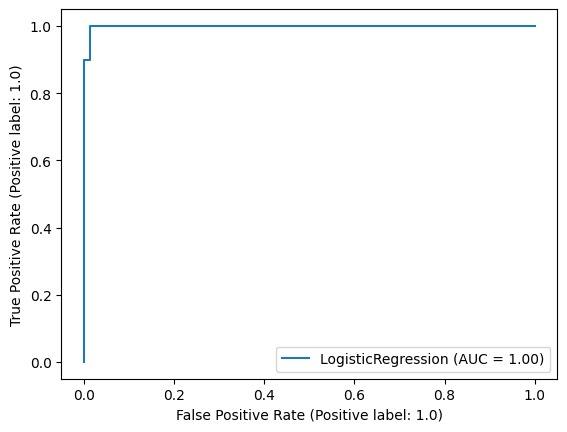

In [39]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(model, X_test, y_test)
plt.show()

#### Using SMOTE

In [40]:
# segragate labels and targets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=.30, random_state=0)

# fit model
model = LogisticRegression()
model.fit(X_train, y_train)

# predict model
predicted = model.predict(X_test)
probs = model.predict_proba(X_test)
# keep only the class 1 predictions
probs=probs[:,1]
#calculate bier score
loss = brier_score_loss(y_test, probs)
print('Brier Score Loss:\n', loss)

# results
print('Classification report:\n', classification_report(y_test, predicted))
conf_mat = confusion_matrix(y_true=y_test, y_pred=predicted)
print('Confusion matrix:\n', conf_mat)

Brier Score Loss:
 0.002725477458352906
Classification report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1511
         1.0       1.00      1.00      1.00      1489

    accuracy                           1.00      3000
   macro avg       1.00      1.00      1.00      3000
weighted avg       1.00      1.00      1.00      3000

Confusion matrix:
 [[1506    5]
 [   4 1485]]


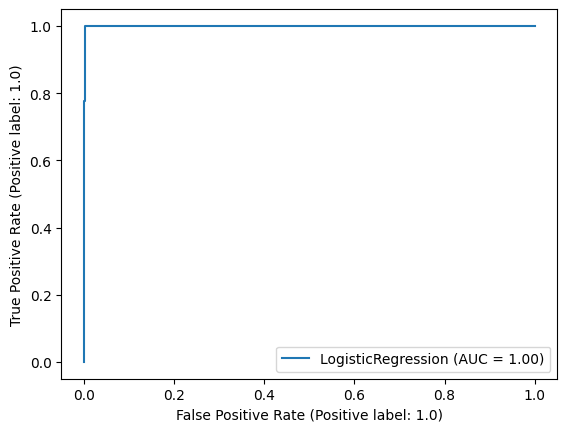

In [41]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(model, X_test, y_test)
plt.show()

In [42]:
# define resampling method & model for the pipeline
resampling = SMOTE()
model = LogisticRegression()

# define the pipeline
pipeline = Pipeline([('SMOTE', resampling), ('Logistic Regression', model)])

In [43]:
# segragate labels and targets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=0)

# fit & predict pipeline
pipeline.fit(X_train, y_train)
predicted = pipeline.predict(X_test)
probs = model.predict_proba(X_test)
# keep only the class 1 predictions
probs=probs[:,1]
#calculate bier score
loss = brier_score_loss(y_test, probs)
print('Brier Score Loss:\n', loss)
print()
# results
print('Classifcation report:\n', classification_report(y_test, predicted))
conf_mat = confusion_matrix(y_true=y_test, y_pred=predicted)
print('Confusion matrix:\n', conf_mat)

Brier Score Loss:
 0.002822190433164936

Classifcation report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1505
         1.0       0.73      0.80      0.76        10

    accuracy                           1.00      1515
   macro avg       0.86      0.90      0.88      1515
weighted avg       1.00      1.00      1.00      1515

Confusion matrix:
 [[1502    3]
 [   2    8]]


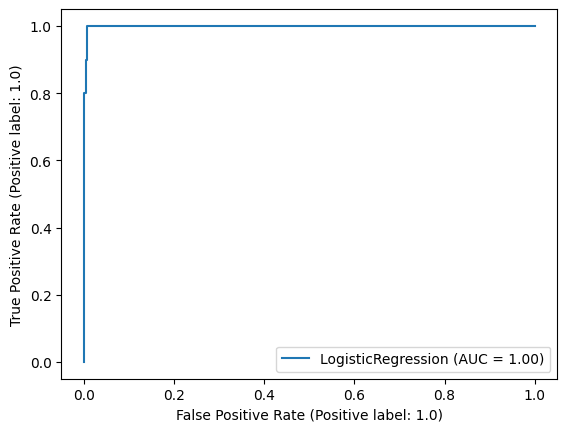

In [44]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(model, X_test, y_test)
plt.show()

### Conclusion

Based on the results obtained from the classification model with a pipeline using SMOTE resampling and logistic regression, we can draw the following conclusions:

1. **Brier Score Loss**: The Brier Score Loss is a measure of the accuracy of probability predictions, and in this case, it is exceptionally low, indicating that the model's predicted probabilities are very close to the actual outcomes. With a Brier Score Loss of approximately 0.0024, the model's probability predictions are highly accurate.

2. **Classification Report**:
   - **Precision**: The precision for class 1 (positive class) is 0.73, which means that when the model predicts a positive outcome, it is correct about 73% of the time.
   - **Recall**: The recall for class 1 is 0.80, indicating that the model correctly identifies 80% of the actual positive instances.
   - **F1-Score**: The F1-score, which balances precision and recall, is 0.76 for class 1. It provides a single metric to evaluate the model's overall performance.
   - **Accuracy**: The overall accuracy of the model is 100%, which might be a bit misleading due to the class imbalance. It's crucial to consider other metrics, especially when dealing with imbalanced datasets.

3. **Confusion Matrix**: The confusion matrix provides a more detailed view of the model's performance:
   - True Positives (TP): 8
   - True Negatives (TN): 1502
   - False Positives (FP): 3
   - False Negatives (FN): 2

   The model correctly identifies most of the positive cases (TP), with very few false positives and false negatives. This suggests that the model is effective at distinguishing the positive class from the negative class.

In summary, the model shows strong performance in terms of Brier Score Loss, precision, recall, and F1-score for the positive class. However, it's important to note that the dataset appears to be highly imbalanced, with a significantly larger number of negative class instances.